<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

<Ответ>

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,ID,Date,tsID,ACTUAL,Temp,Saturday,Sunday
0,1,01.01.2010,4,35489.95,-0.9,0.0,1
1,2,02.01.2010,4,35413.59,-0.1,1.0,0
2,3,03.01.2010,4,34802.67,-3.9,0.0,1
3,4,04.01.2010,4,36003.84,-13.7,0.0,1
4,5,05.01.2010,4,37622.96,-16.9,0.0,1


In [5]:
data['Date'] = [datetime.strptime(d, '%d.%m.%Y') for d in data['Date']]

In [6]:
data.index = data['Date']
data['ds'] = data['Date']
data['y'] = data['ACTUAL']
data['t'] = data['Temp']
data = data.drop(['Date', 'Saturday', 'Sunday', 'ACTUAL', 'Temp'], axis=1)

In [7]:
data.head()

,ID,tsID,ds,y,t
Date,,,,,
2010-01-01,1,4,2010-01-01,35489.95,-0.9
2010-01-02,2,4,2010-01-02,35413.59,-0.1
2010-01-03,3,4,2010-01-03,34802.67,-3.9
2010-01-04,4,4,2010-01-04,36003.84,-13.7
2010-01-05,5,4,2010-01-05,37622.96,-16.9


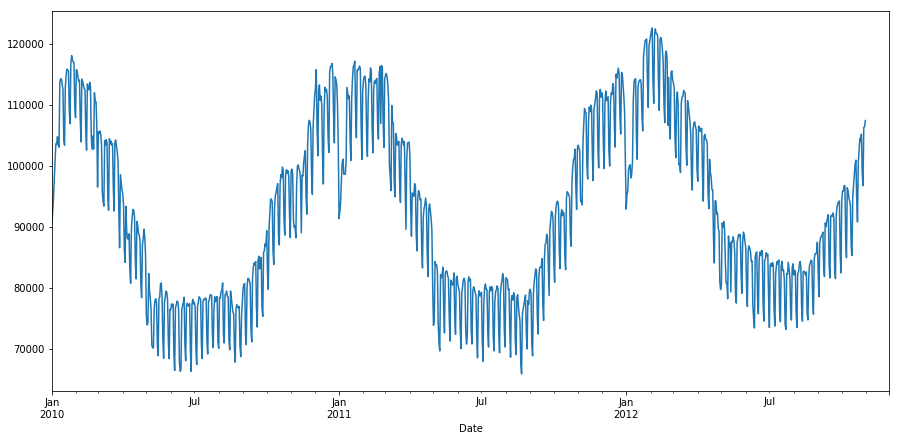

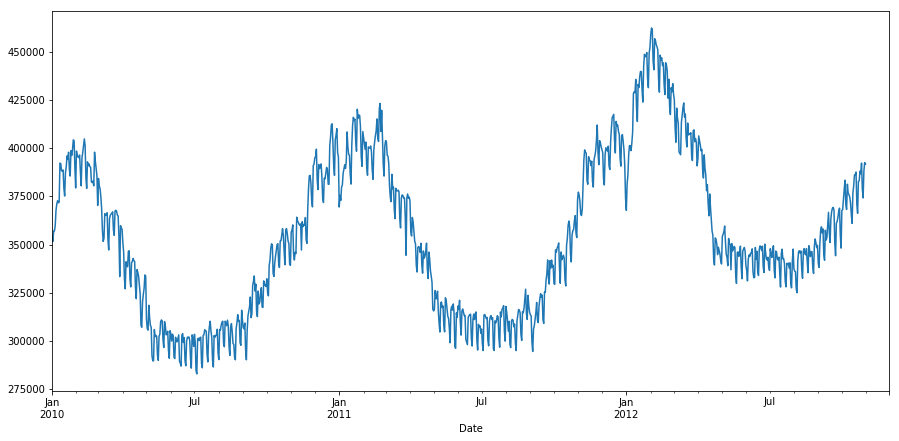

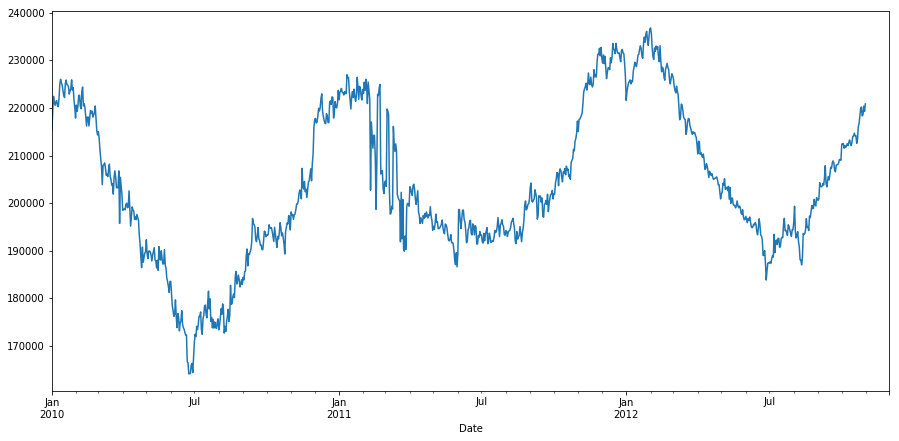

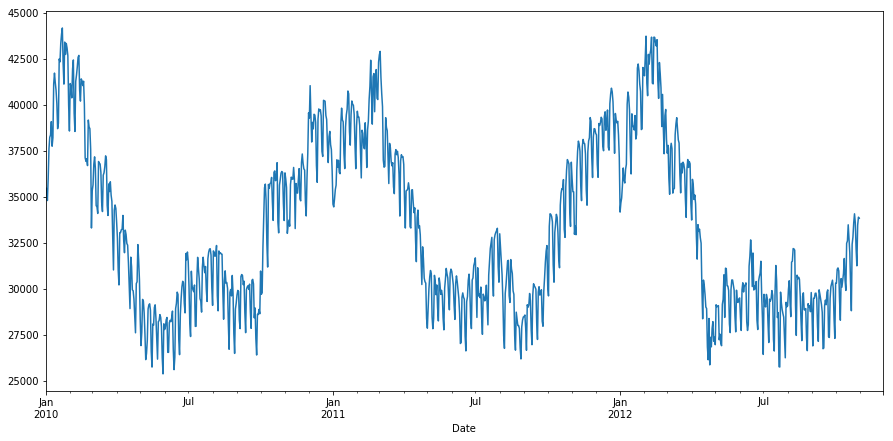

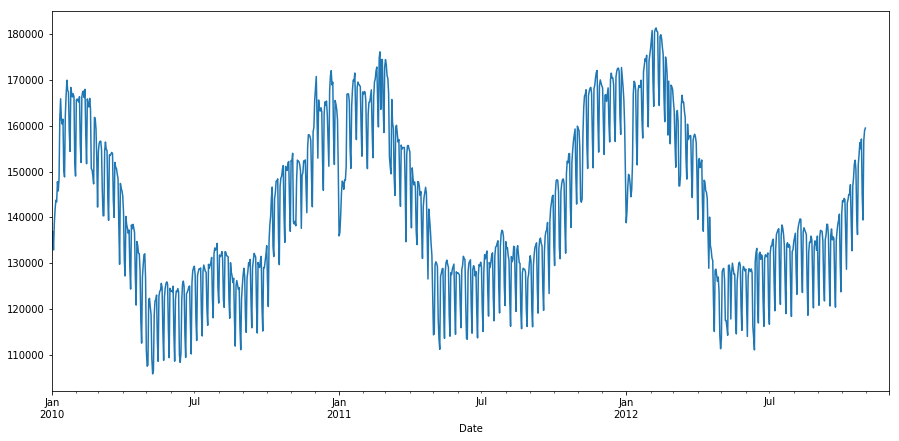

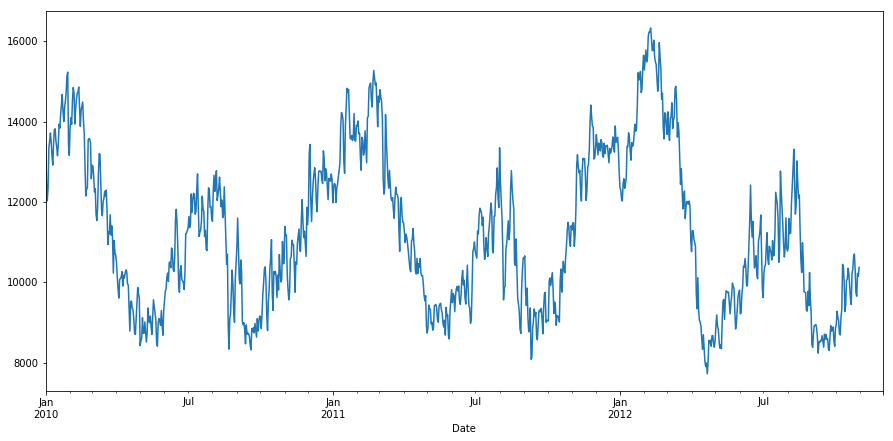

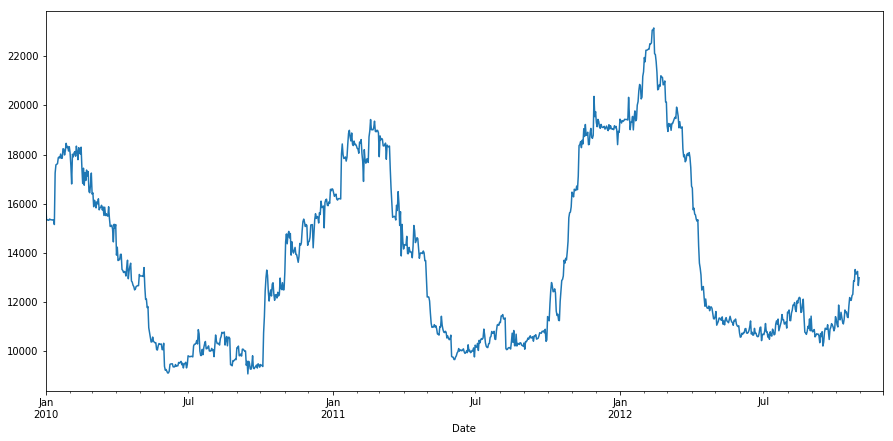

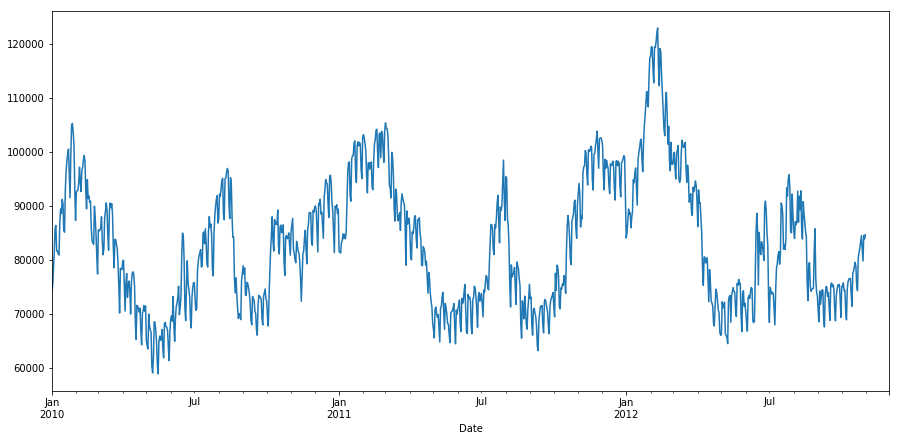

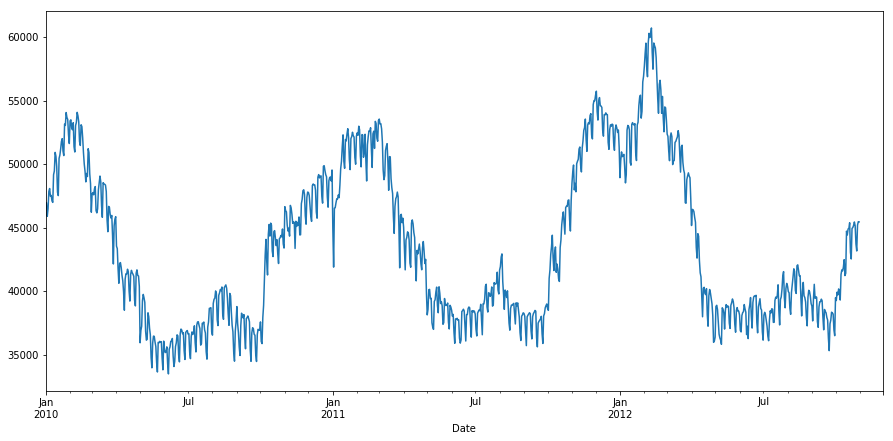

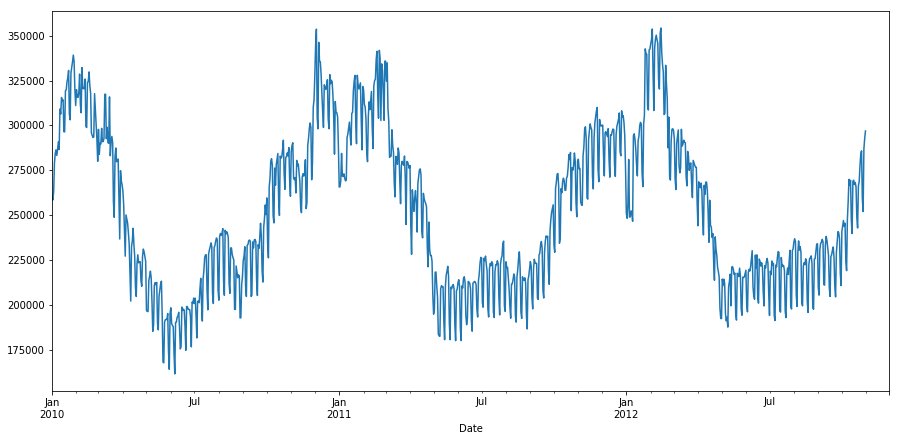

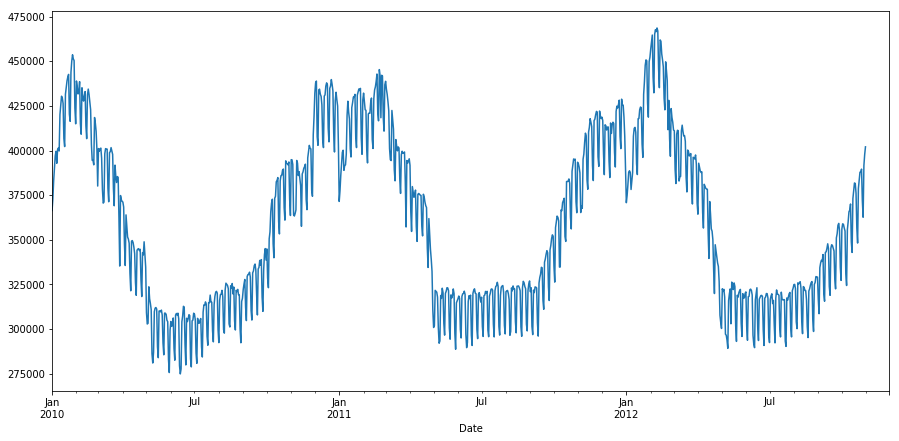

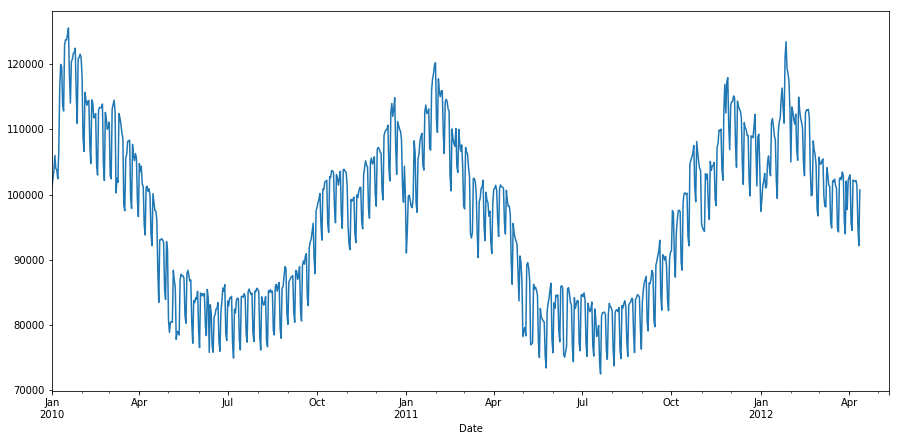

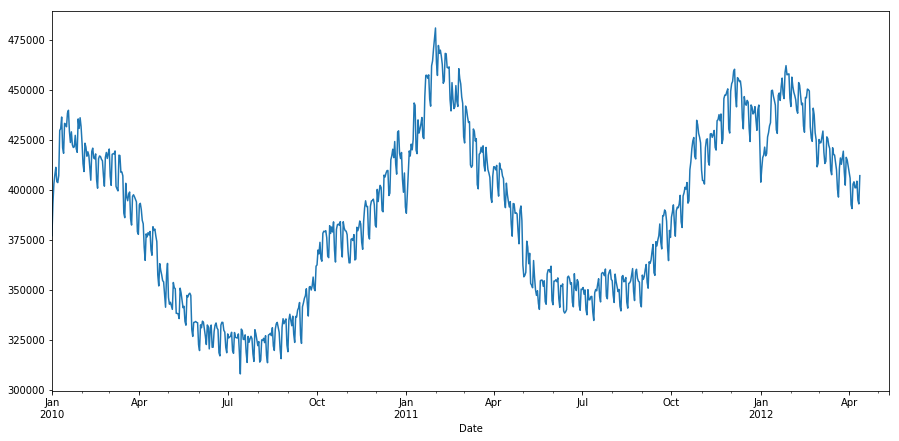

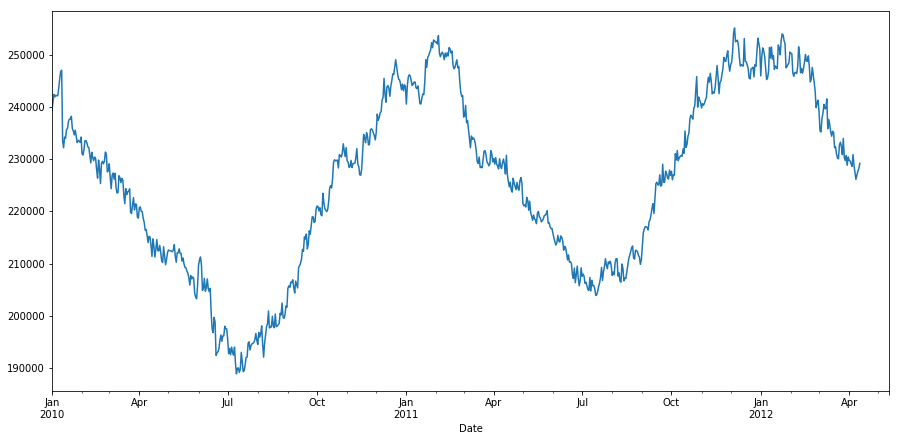

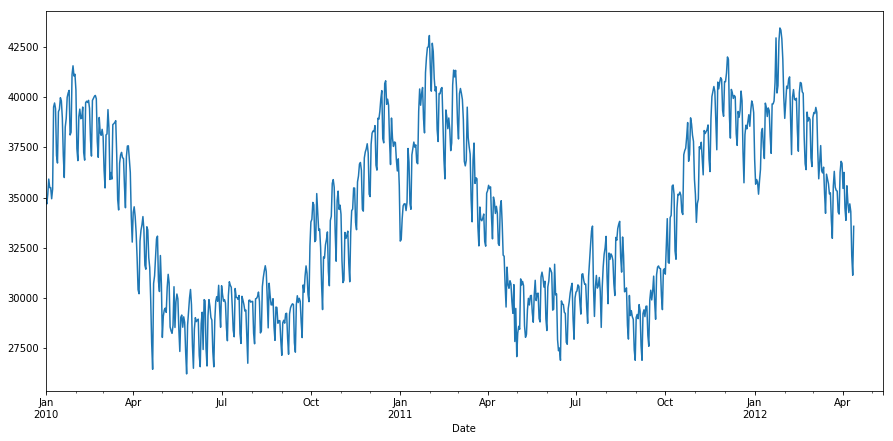

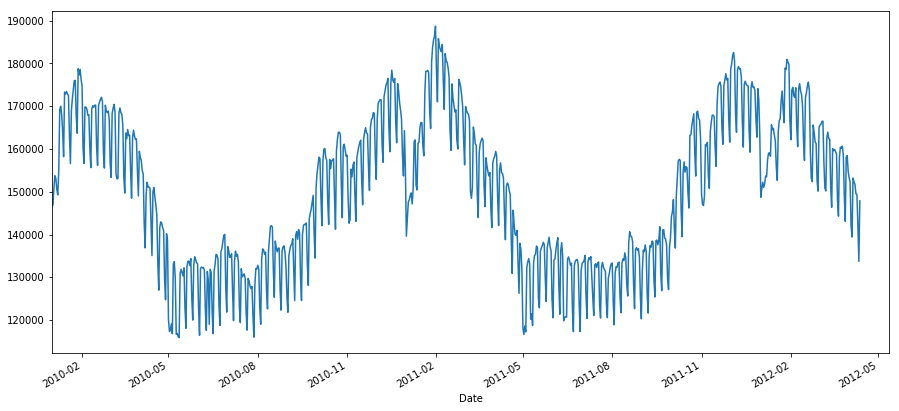

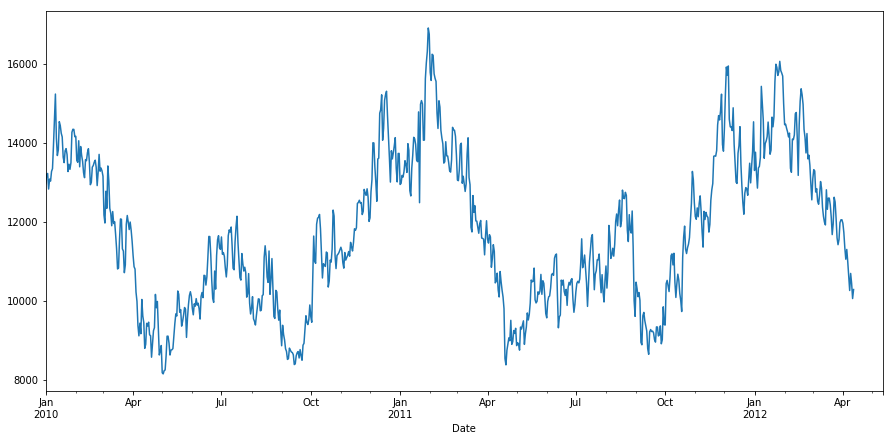

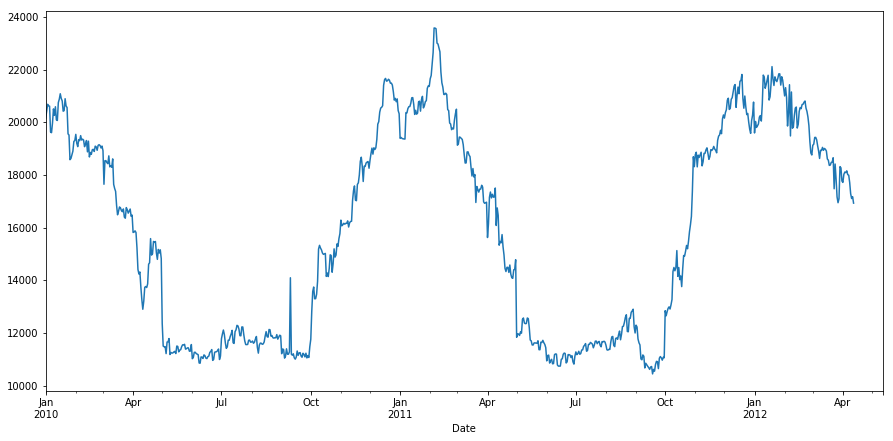

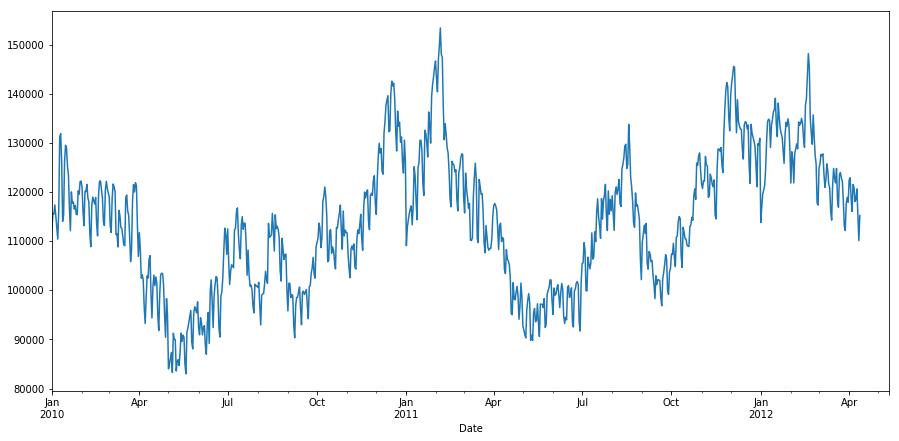

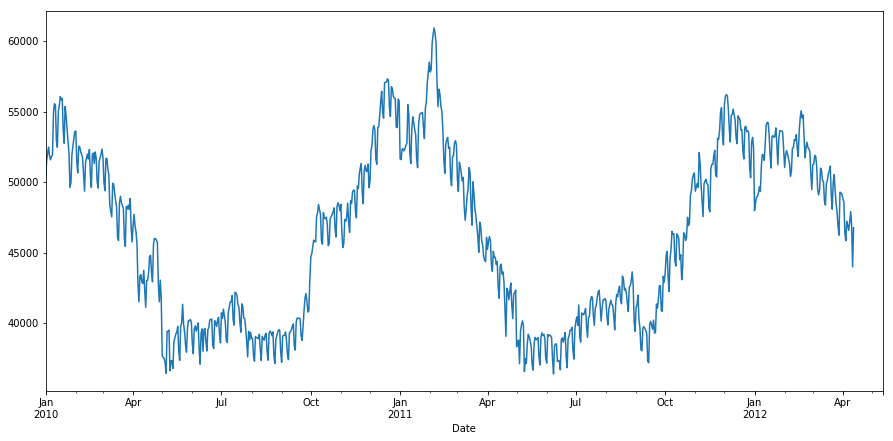

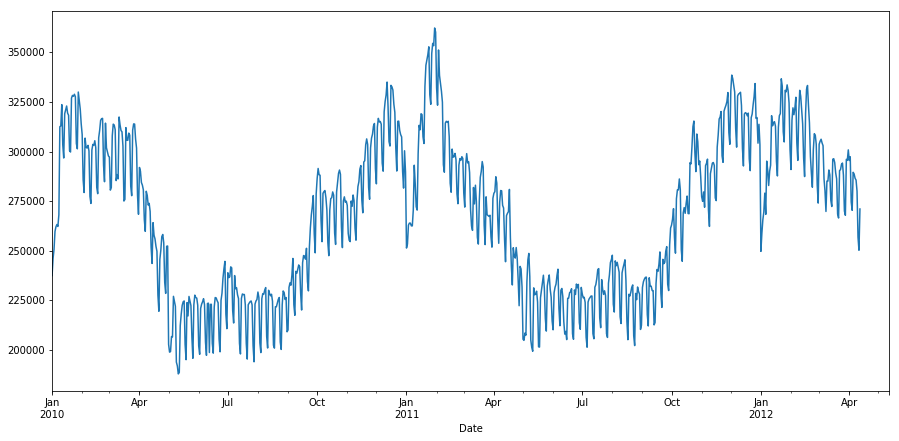

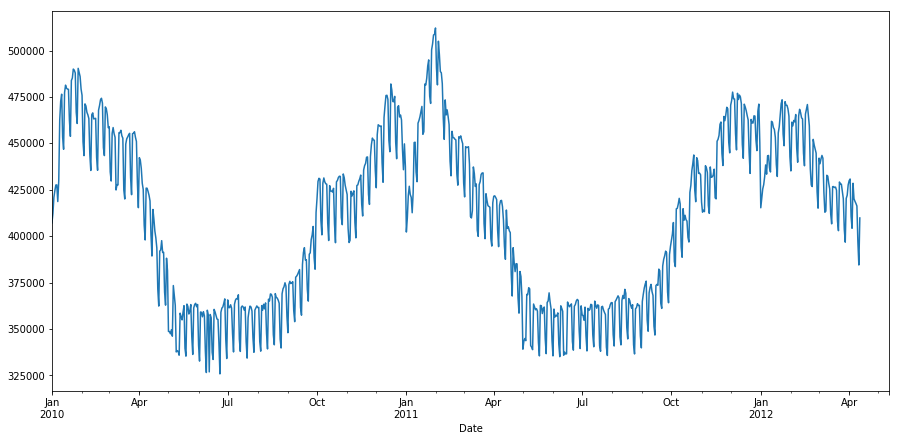

In [8]:
tsid = np.sort(np.unique(data['tsID']))
for i in tsid:
    data.loc[data['tsID']==i, 'y'].plot(figsize=(15,7))
    plt.show()

In [10]:
from fbprophet import Prophet

In [11]:
predict = pd.DataFrame()
index = np.zeros(shape=660)

for i in tsid:
    model = Prophet()  
    model.fit(data[data['tsID']==i][:-30])
    
    predict = predict.append(model.predict(data[data['tsID']==i][-30:]))
    #index += data[data['tsID']==i][-30:]['ID']
    print(len(predict))

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


30


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


60


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


90


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


120


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


150


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


180


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


210


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


240


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


270


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


300


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


330


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


360


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


390


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


420


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


450


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


480


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


510


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


540


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


570


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


600


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


630
660


In [12]:
index = []
for i in tsid:
    index += data[data['tsID']==i]['ID'][-30:].tolist()

In [20]:
predict.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
7831,2012-05-08,399130.022887,398622.187248,399680.294896,320929.162495,343833.703466,-66433.172946,-66433.172946,-66433.172946,-66433.172946,-66433.172946,-66433.172946,-12017.607214,-12017.607214,-12017.607214,-54415.565732,-54415.565732,-54415.565732,332696.849941
7832,2012-05-09,399118.469197,398566.814385,399722.069449,314860.709121,337459.911685,-72961.330502,-72961.330502,-72961.330502,-72961.330502,-72961.330502,-72961.330502,-18460.847235,-18460.847235,-18460.847235,-54500.483267,-54500.483267,-54500.483267,326157.138696
7833,2012-05-10,399106.915508,398518.572666,399766.229314,339858.237874,361270.641504,-48215.872535,-48215.872535,-48215.872535,-48215.872535,-48215.872535,-48215.872535,6253.277995,6253.277995,6253.277995,-54469.150530,-54469.150530,-54469.150530,350891.042973
7834,2012-05-11,399095.361819,398467.238283,399796.177830,341041.195061,362566.138000,-47777.407172,-47777.407172,-47777.407172,-47777.407172,-47777.407172,-47777.407172,6565.479869,6565.479869,6565.479869,-54342.887041,-54342.887041,-54342.887041,351317.954647
7835,2012-05-12,399083.808129,398414.868039,399852.315451,340056.991980,361796.849647,-47809.822386,-47809.822386,-47809.822386,-47809.822386,-47809.822386,-47809.822386,6333.444370,6333.444370,6333.444370,-54143.266757,-54143.266757,-54143.266757,351273.985743


In [14]:
predict.index = index

In [24]:
example = pd.read_csv('SubmissionSample.csv')

In [26]:
example.index = example['ID']
example = example.drop('ID', axis=1)

In [28]:
example['PREDICTED'] = predict['yhat']

In [30]:
# save forecast to disk for further submission
example.to_csv('new_result.csv')

In [29]:
example

,PREDICTED
ID,
16707,105965.572350
16708,105737.666695
16709,99114.646641
16710,96406.999514
16711,105322.577413
16712,106867.104812
16713,107391.621052
16714,107481.839543
16715,107184.599970
